# Get Started

This package consists of not only the translations, but also with the integration of running the circuit and interpreting the results. They are divided into three main parts: **1) Interpreter, 2) Frontend and 3) Backend**.

To get started with our package, you can use the **Interpreter**, which acts as the hub of everything, in order they are translating the circuit, running the translated circuit and interpret the results. The simplest way is to pass in a gate-based circuit in Qiskit. I are going to use a small example here: the Bell state.


In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

We can check the actual results after running it with an AerSimulator, it is also provied in the context of an interpreter: GateBasedInterpreter.

To use any interpreter, you will need to create an instance first, and with possible options or parameters. In the gate-based case, nothing needs to be passed. Then you can pass in the qiskit quantum circuit into the run(\*) method to get the results in the type of dictionary. Lastly, you can plot it using qiskit's visualization module.


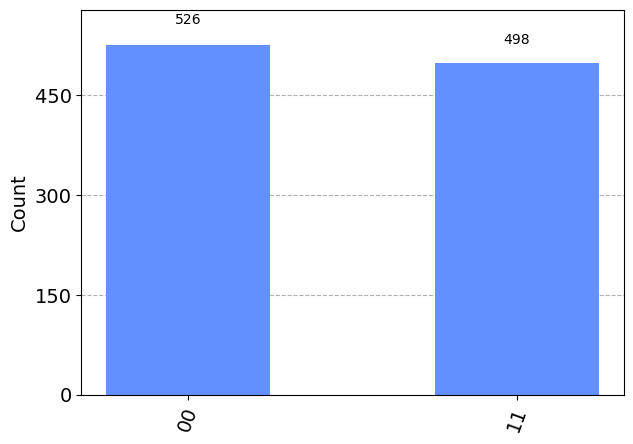

In [2]:
from qiskit.visualization import plot_histogram
from interpreter.gate import GateBasedInterpreter

plot_histogram(GateBasedInterpreter().run(qc))

## 5- and 3-local translation (fully working)

The 1st translation comes from Abrahnov et al's paper under Section 3. This translation links each unitary gate with a corresponding clock qubit so it can propagate the gates correctly in the Hamiltonian. The actual results will be paired with the final clock state, which is another layer of a possibility.

There are a few parameters in this Interpreter (ordered):

1. locality: it specifies the type of this translation, in general, 3-local can achieve a more stable results, but with a higher computational cost.

2. transpile_to_two: the circuit should be translpiled to 2- or 1-qubit gates only to satsify the 5- or 3-local translation. But during our test, using any-qubit gates can still achieve the actual results.

3. info: printing out extra information about the translation

4. end_i: it is a technique mentioned in the paper, by adding some identity gates at the end, the possibility of the final clock states may increase.

5. compress: it is a technique that I attempt to improve the translation.


/opt/miniconda3/envs/ac/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])



*** INFO ***

locality mode = 5
compress mode = no
qubit map = None
# of gates = 2
# of computation qubits (n) = 2
# of clock qubits (L) = 2
# of ending identities = 0

*** END OF INFO ***



100%|██████████| 4/4 [00:00<00:00, 196.23it/s]


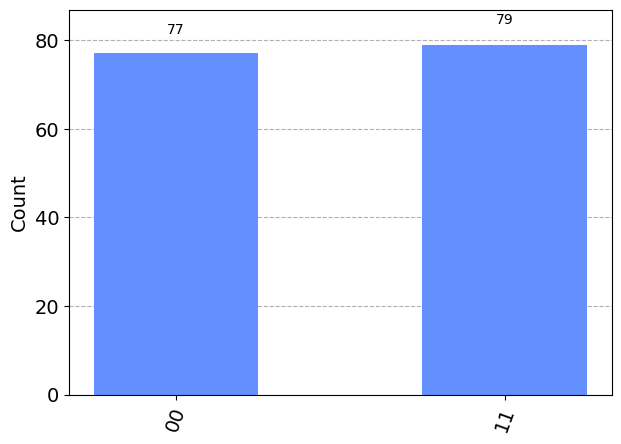

In [3]:
from interpreter.adiabatic import AdiabaticInterpreter

# the default locality is 5
plot_histogram(AdiabaticInterpreter().run(qc))

## 2-local translation (not working)

The 2nd translation still comes from Abrahnov et al's paper, which is under Section 4. It is a 2-local translation, which means it is the most applicable on real adiabatic hardwares. But it requires a specific layout of the input circuit, which drastically increase the usage of clock qubits. Consequently, the run() of this interpreter is adjusted to a list of gate methods, which is assumed to be the pattern described in the paper.

Note that this translation never produce a satisfying results. Here are two main chanlleges:

1. This translation is no more at a continous line of qubits, the qubits are aligned in a planar grid, which increase the difficulty of the implementation of the Hamiltonian.

2. The qubit used in this translation is a 6-state particle, where my workaround is to use a 3-qubit system to simulate that, which furtherly increase the qubit usages and also effect the actual locality.


In [4]:
from interpreter.planar import PlanarClockInterpreter
from qiskit.circuit.library.standard_gates import *

# don't include the ending identity gates for each round
# but if it is an identity gate in the propgation, then include it
# PlanarClockInterpreter().run([[HGate, CXGate]])

## Tensor Network translation (WIP)

I attempted to implement the previous 2-local translation for months, but I can't make any progress. Also, its trade-off on the usage of clock qubits are pretty unacceptable. So I move towards on the a more practical approach in a recently published paper from Anshu et al. Simiarly, their translation utilize the qubits in a grid, but with a different technique: they encode the unitary in a tensor network, and propagate the unitary through gate teleportation.

Note that this is still a work in progress, where the unitary didn't propogate correctly with the gate teleportation. But the final results are in an expected form of PEPS state (pairs of bell state |00> or |11>)

100%|██████████| 11/11 [00:11<00:00,  1.06s/it]


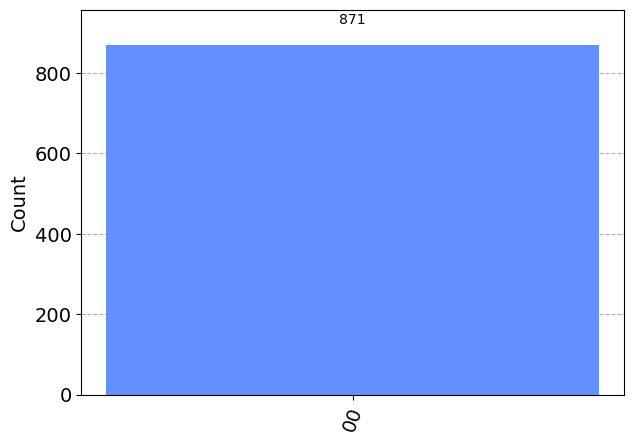

In [5]:
from interpreter.tensor import TensorInterpreter

plot_histogram(TensorInterpreter().run(qc))